In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

In [3]:
folder_benign_train_path= 'images/data/train/benign'
folder_malignant_train_path = 'images/data/train/malignant'

folder_benign_test_path= 'images/data/test/benign'
folder_malignant_test_path= 'images/data/test/malignant'

read = lambda imgname: np.asarray(Image.open(imgname).convert("RGB"))     #lambda function to convert an image to RGB(if necessary) and returns a numpy array of the same


In [4]:
# Load in training pictures 
imgs_benign = [read(os.path.join(folder_benign_train_path, filename)) for filename in os.listdir(folder_benign_train_path)]
X_benign = np.array(imgs_benign, dtype='uint8')
imgs_malignant = [read(os.path.join(folder_malignant_train_path, filename)) for filename in os.listdir(folder_malignant_train_path)]
X_malignant = np.array(imgs_malignant, dtype='uint8')

# Load in testing pictures
imgs_benign = [read(os.path.join(folder_benign_test_path, filename)) for filename in os.listdir(folder_benign_test_path)]
X_benign_test = np.array(imgs_benign, dtype='uint8')
imgs_malignant = [read(os.path.join(folder_malignant_test_path, filename)) for filename in os.listdir(folder_malignant_test_path)]
X_malignant_test = np.array(imgs_malignant, dtype='uint8')

In [5]:
print(len(X_benign))
print(len(X_malignant))
print(len(X_benign_test))
print(len(X_malignant_test))

1440
1197
360
300


In [6]:
print(X_benign.shape)
print(X_malignant.shape)
print(X_benign_test.shape)
print(X_malignant_test.shape)

(1440, 224, 224, 3)
(1197, 224, 224, 3)
(360, 224, 224, 3)
(300, 224, 224, 3)


In [7]:
# Create labels: benign are labelled as 0 and malignant are labelled  as 1
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])


# Merge data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

s = np.arange(X_train.shape[0])     #returns an array of numbers from 0 to X_train.shape[0] => [0 - 1440)
np.random.shuffle(s)                #shuffles the array in place
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])      #returns an array of numbers from 0 to X_test.shape[0] => [0 - 1197)
np.random.shuffle(s)                #shuffles the array in place
X_test = X_test[s]
y_test = y_test[s]

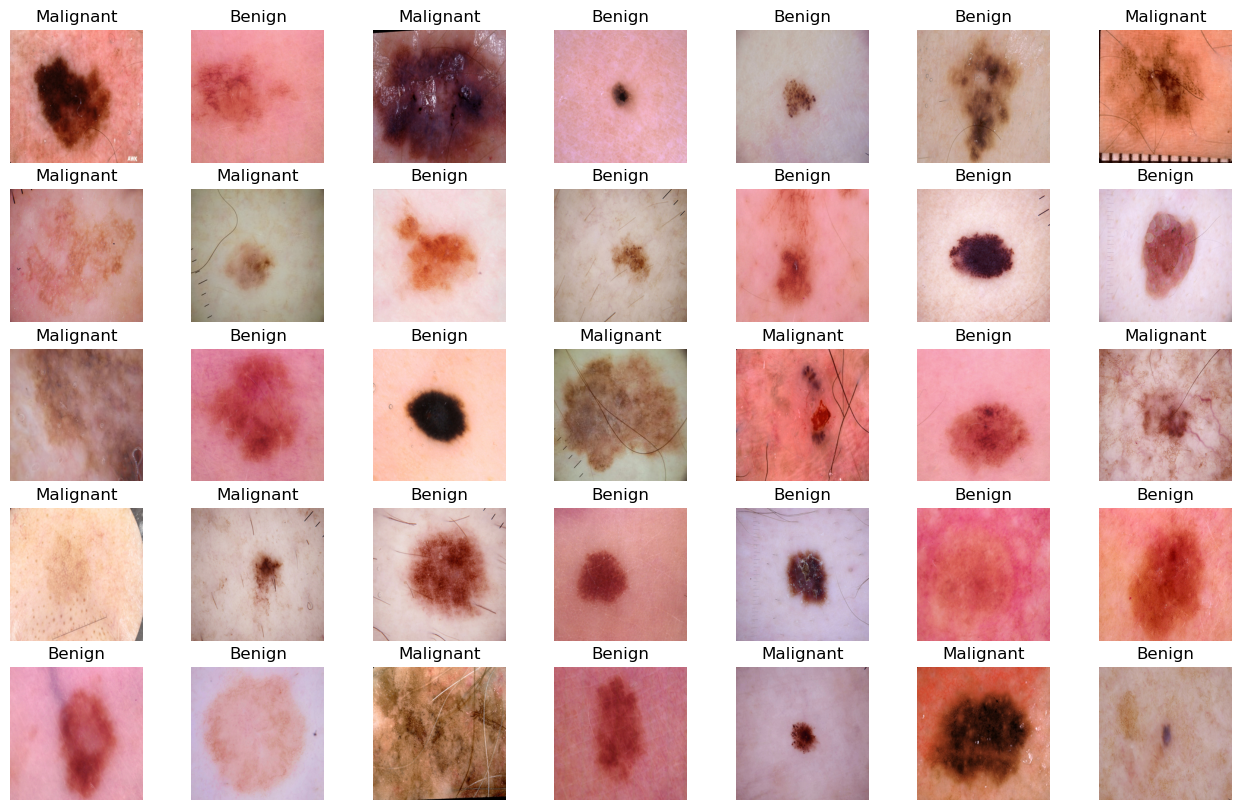

In [8]:
w=40
h=30
fig=plt.figure(figsize=(16, 10))
columns = 7
rows = 5

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i])
    plt.axis("off")
plt.show()

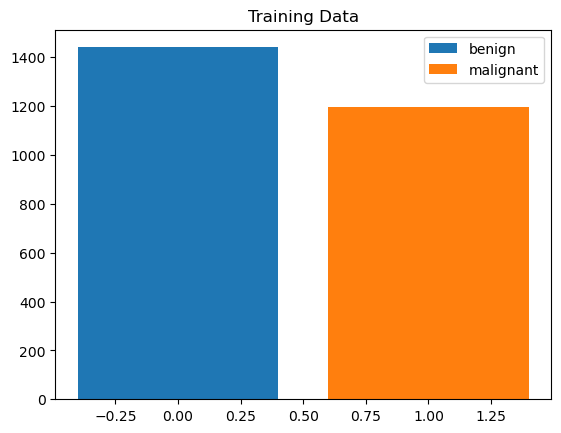

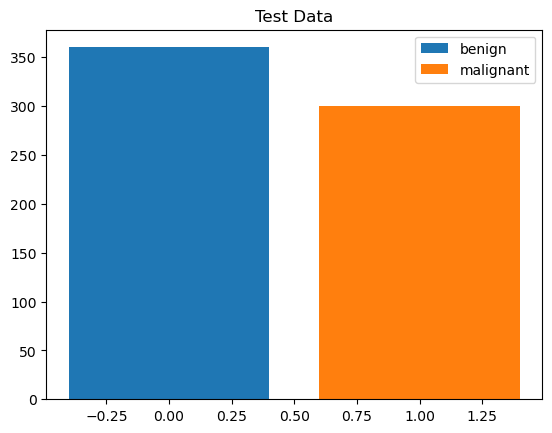

In [9]:
plt.bar(0, y_train[np.where(y_train == 0)].shape[0], label = 'benign')
plt.bar(1, y_train[np.where(y_train == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Training Data")
plt.show()

plt.bar(0, y_test[np.where(y_test == 0)].shape[0], label = 'benign')
plt.bar(1, y_test[np.where(y_test == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Test Data")
plt.show()